### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
digits = datasets.load_digits()
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


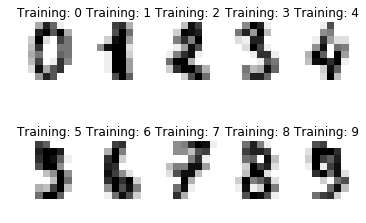

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.title(f'Training: {label}')
    plt.imshow(image, cmap=plt.cm.gray_r)

In [4]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)  
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.title(title, size = 20)
    plt.ylabel('True label', size = 15)
    plt.xlabel('Predicted label', size = 15)

Accuracy:  0.9666666666666667


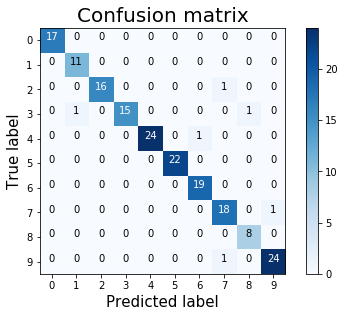

In [5]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.1, random_state=42)
# 建立模型
clf = GradientBoostingClassifier(random_state = 42)
# 訓練模型
clf.fit(x_train, y_train)
# 預測測試集
y_pred = clf.predict(x_test)

# 準確率
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
# 混淆矩陣
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, digits.target_names)